<a href="https://colab.research.google.com/github/gakurujnr/Autolib-electric-car-sharing-service-company/blob/master/Moringa_Data_Science_Core_W3_Independent_Project_2019_08_Peter_Gakuru_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Question

To determine which day of the week blue cars are most popular

## Metrics For Success

## Context

## Experimental Designs

## All Imports

In [0]:
## Importing libraries
#Import pandas
import pandas as pd
#Importing numpies
import numpy as np
# Import matplotlid
import matplotlib.pyplot as plt
%matplotlib inline
##Import seaborn
import seaborn as sns

## Loading Data

In [3]:
## Loading the dataset
blu = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
blu.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [15]:
## load the the dictionary of the dataset
dictionary = pd.read_excel("/content/columns_explanation.xlsx")
dictionary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [7]:
## View information of our data
blu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [8]:
len(blu)

16085

In [10]:
blu.shape

(16085, 13)

In [13]:
blu.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

## Tidyng the dataset 

In [17]:
## Creating a copy of dataset to work on and not altering or affecting the original data
bl = blu.copy()
bl.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [18]:
# Checking the columns
bl.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [19]:
## Replacing and writing columns in lower case
bl.columns = bl.columns.str.lower().str.replace(' ', '_')
bl.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [0]:
## Renaming inappropriate column names
bl.rename(columns = {"n_daily_data_points": "daily_data_points", "dayofweek": "day_of_week"}, inplace = True)

In [24]:
## Checking if the column names have changed
bl.columns

Index(['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

### Checking Null Values

In [26]:
## Checking if gthere are any null values
bl.isnull().sum()

postal_code               0
date                      0
daily_data_points         0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

There are no null values in the dataset

In [28]:
bl.dtypes

postal_code                int64
date                      object
daily_data_points          int64
day_of_week                int64
day_type                  object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object

## Checking For Outliers

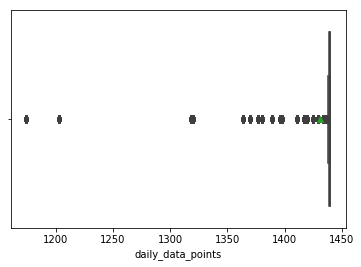

In [33]:
## FInding outliers using seaborn for numerical variables
sns.boxplot(bl['daily_data_points'], showmeans = True)

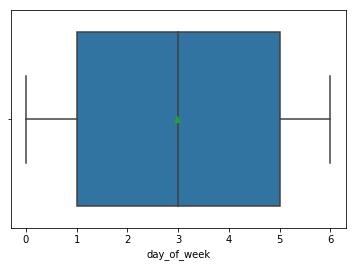

In [35]:
##
sns.boxplot(bl['day_of_week'], showmeans = True)

The days of the week column has no outliers

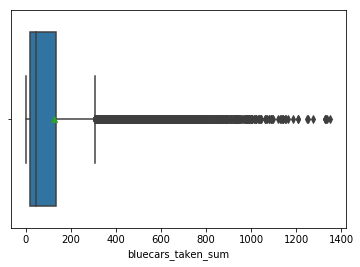

In [36]:
# checking outliers in bluecars_taken_sum
sns.boxplot(bl['bluecars_taken_sum'], showmeans = True)

Has outliers. I wont drop the outliers as the blue cars that were taken sum is 1400

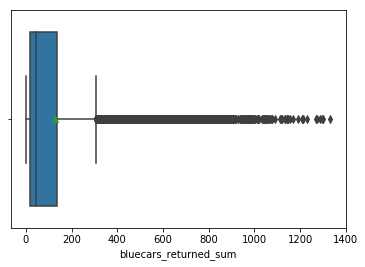

In [37]:
# bluecars_returned_sum 
sns.boxplot(bl['bluecars_returned_sum'], showmeans = True)

Has outliers. I wont drop the outliers as the blue cars that were taken sum is 1400

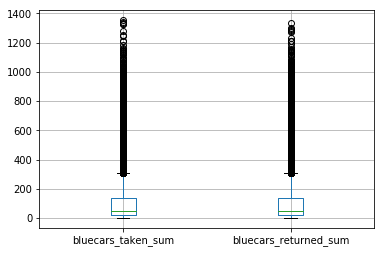

In [42]:
## 
boxplot = bl.boxplot(["bluecars_taken_sum","bluecars_returned_sum"])
plt.show()

In [0]:
#"slots_freed_sum ", "slots_taken_sum"
## 
# boxplot = bl.boxplot(["slots_freed_sum ", "slots_taken_sum"])
# plt.show()